In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import os
import json
from json2html import *
from IPython.core.display import display, HTML
%matplotlib inline


In [49]:
import nltk

In [3]:
print(os.getcwd())
with open(os.getcwd()+'\data\\train.json',encoding="utf8") as f:
   data = json.load(f)


D:\ML Projects\DeepLearning_Coding_Task\NLU


In [4]:
df = pd.DataFrame(data)
#df = df.T
table=df.to_html()
with open("Data.html", "w", encoding="utf-8") as file:
    file.write(table)

In [5]:
#display(HTML(json2html.convert(json = data)))

In [6]:
#html =  json2html.convert(json = data)
#f = open('tabular_data.html','w',encoding="utf-8")
#f.write(html)

In [18]:
dfT=df.T
#dfT.loc['intent']
dfT.head()

,intent,text,slots,positions
0,AddToPlaylist,Add a tune to my elrow Guest List,"{'music_item': 'tune', 'playlist_owner': 'my',...","{'music_item': [6, 9], 'playlist_owner': [14, ..."
1,AddToPlaylist,Add a guy is a guy to the infinite indie folk ...,"{'entity_name': 'a guy is a guy', 'playlist': ...","{'entity_name': [4, 17], 'playlist': [26, 44]}"
2,AddToPlaylist,Put hampartsoum limondjian in running to rock ...,"{'artist': 'hampartsoum limondjian', 'playlist...","{'artist': [4, 25], 'playlist': [30, 59]}"
3,AddToPlaylist,Add Recalled to Life to This Is Alejandro Fern...,"{'entity_name': 'Recalled to Life', 'playlist'...","{'entity_name': [4, 19], 'playlist': [24, 50]}"
4,AddToPlaylist,Add Bronislau Kaper to the drive playlist.,"{'artist': 'Bronislau Kaper', 'playlist': 'dri...","{'artist': [4, 18], 'playlist': [27, 31]}"


In [19]:
dfT.columns

Index(['intent', 'text', 'slots', 'positions'], dtype='object')

In [41]:
intentList =dfT[['text','intent']]

In [42]:
intentList.head()

,text,intent
0,Add a tune to my elrow Guest List,AddToPlaylist
1,Add a guy is a guy to the infinite indie folk ...,AddToPlaylist
2,Put hampartsoum limondjian in running to rock ...,AddToPlaylist
3,Add Recalled to Life to This Is Alejandro Fern...,AddToPlaylist
4,Add Bronislau Kaper to the drive playlist.,AddToPlaylist


In [34]:
html =  json2html.convert(json = intentList.to_json(orient='records'))
f = open('intent.html','w',encoding="utf-8")
f.write(html)

874682

In [37]:
intentList['intent'].unique()

array(['AddToPlaylist', 'BookRestaurant', 'GetWeather', 'PlayMusic',
       'RateBook', 'SearchCreativeWork', 'SearchScreeningEvent'],
      dtype=object)

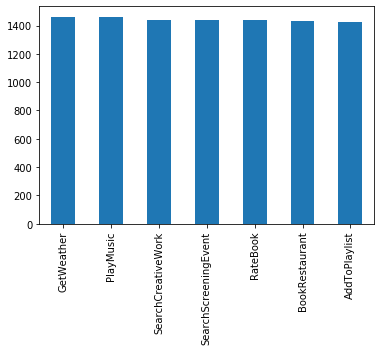

In [40]:
fig, ax = plt.subplots()
intentList['intent'].value_counts().plot(ax=ax, kind='bar')

In [51]:
cleanList = intentList.copy()

In [55]:
tokenizer = nltk.tokenize.TreebankWordTokenizer()
stemmer = LancasterStemmer()

NameError: name 'LancasterStemmer' is not defined

In [52]:
for index, row in cleanList.iterrows():
    text=row['text']
    row['text'] = tokenizer.tokenize(text)



In [54]:
cleanList.tail()

,text,intent
10092,"[I, 'd, like, to, watch, The, Freckled, Fish, ...",SearchScreeningEvent
10093,"[Which, films, are, playing, at, the, closest,...",SearchScreeningEvent
10094,"[show, movie, times, for, AMC, Theatres]",SearchScreeningEvent
10095,"[What, time, is, Do, Sher, playing]",SearchScreeningEvent
10096,"[What, is, the, movie, schedule, for, films, t...",SearchScreeningEvent


<h3>Stem or Lemmatize</h3>